In [48]:
# Addlibrary
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
import seaborn as sns


In [49]:
# Get input data
df_churnBigml20= pd.read_csv("churn-bigml-20.csv",delimiter=",");
df_churnBigml80= pd.read_csv("churn-bigml-80.csv",delimiter=",");

In [50]:
# Merge the two data into a new table
df_new_churn = pd.concat([df_churnBigml20, df_churnBigml80], ignore_index=True);

In [59]:

# Perform one-hot encoding for columns containing string data
X_encoded = pd.get_dummies(X, columns=['State', 'International plan', 'Voice mail plan'])
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_encoded, y)
selected_features = X_encoded.columns[selector.get_support(indices=True)]
print("Selected features:", selected_features)

Selected features: Index(['Number vmail messages', 'Total day minutes', 'Total day charge',
       'Total eve minutes', 'Total eve charge', 'Customer service calls',
       'International plan_0', 'International plan_1', 'Voice mail plan_0',
       'Voice mail plan_1'],
      dtype='object')


In [60]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded[selected_features], y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
# Evaluate the model
y_pred = model.predict(X_test[selected_features])
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9205397301349325
Precision: 0.8028169014084507
Recall: 0.59375
F1 Score: 0.6826347305389222

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       571
           1       0.80      0.59      0.68        96

    accuracy                           0.92       667
   macro avg       0.87      0.78      0.82       667
weighted avg       0.92      0.92      0.92       667



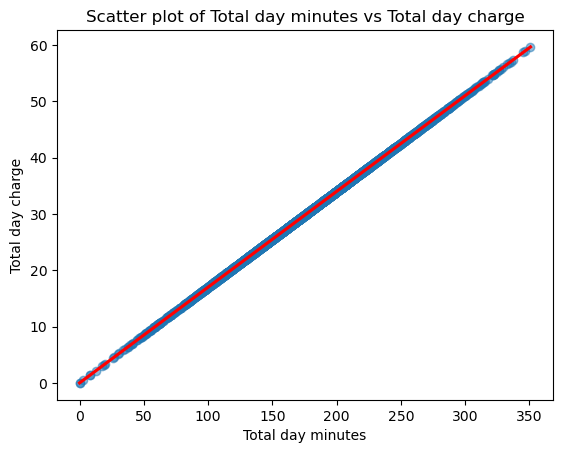

In [62]:
# Scatter chart
plt.scatter(df_new_churn['Total day minutes'], df_new_churn['Total day charge'], alpha=0.5)

# Add a linear regression line
sns.regplot(x='Total day minutes', y='Total day charge', data=df_new_churn, scatter=False, color='red')

plt.title('Scatter plot of Total day minutes vs Total day charge')
plt.xlabel('Total day minutes')
plt.ylabel('Total day charge')
plt.show()

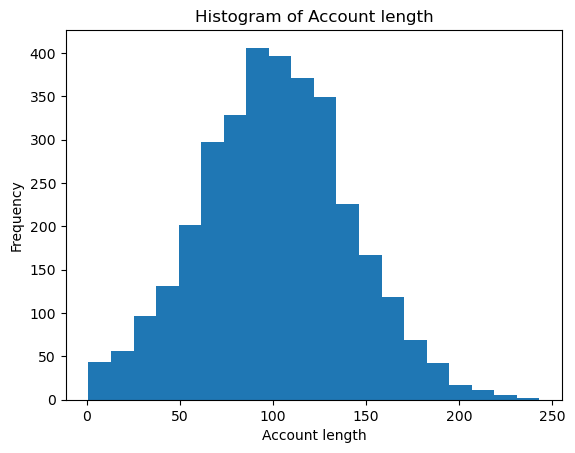

In [63]:
# Histogram chart for the 'Account length' column
plt.hist(df_new_churn['Account length'], bins=20)
plt.title('Histogram of Account length')
plt.xlabel('Account length')
plt.ylabel('Frequency')
plt.show()

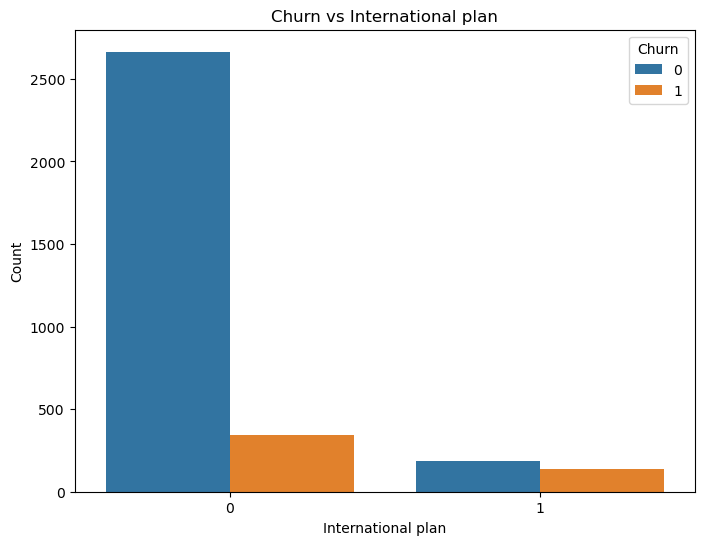

In [64]:
plt.figure(figsize=(8, 6))
sns.countplot(x='International plan', hue='Churn', data=df_new_churn)
plt.title('Churn vs International plan')
plt.xlabel('International plan')
plt.ylabel('Count')
plt.show()

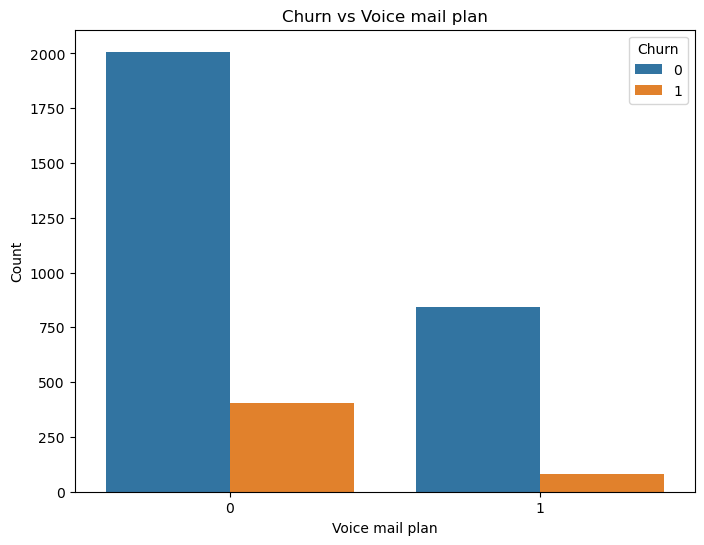

In [65]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Voice mail plan', hue='Churn', data=df_new_churn)
plt.title('Churn vs Voice mail plan')
plt.xlabel('Voice mail plan')
plt.ylabel('Count')
plt.show()


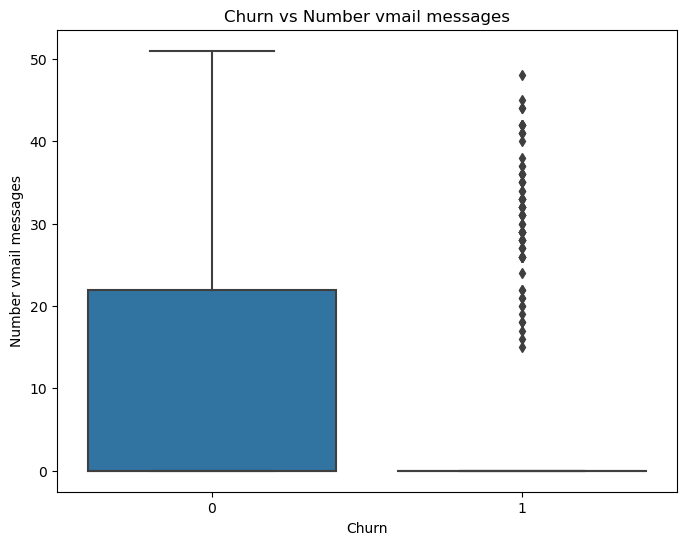

In [66]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Number vmail messages', data=df_new_churn)
plt.title('Churn vs Number vmail messages')
plt.xlabel('Churn')
plt.ylabel('Number vmail messages')
plt.show()

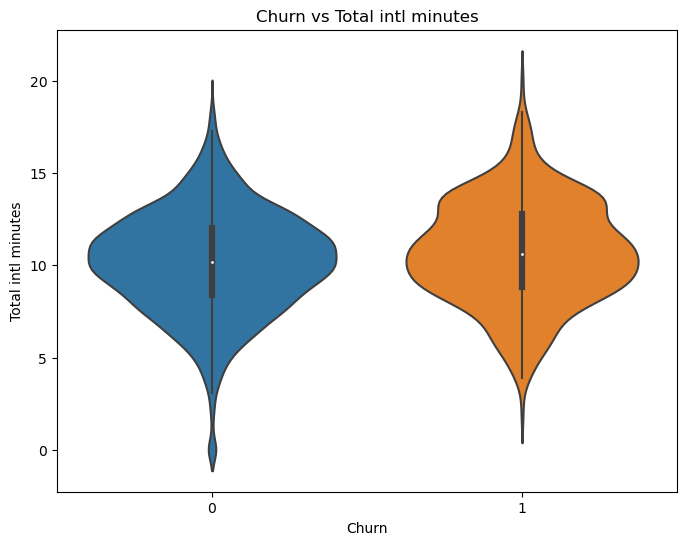

In [67]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Churn', y='Total intl minutes', data=df_new_churn)
plt.title('Churn vs Total intl minutes')
plt.xlabel('Churn')
plt.ylabel('Total intl minutes')
plt.show()

C:\Users\Nam\AppData\Local\Temp\ipykernel_10432\547106294.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue['Total revenue'] = df_revenue[['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']].sum(axis=1)


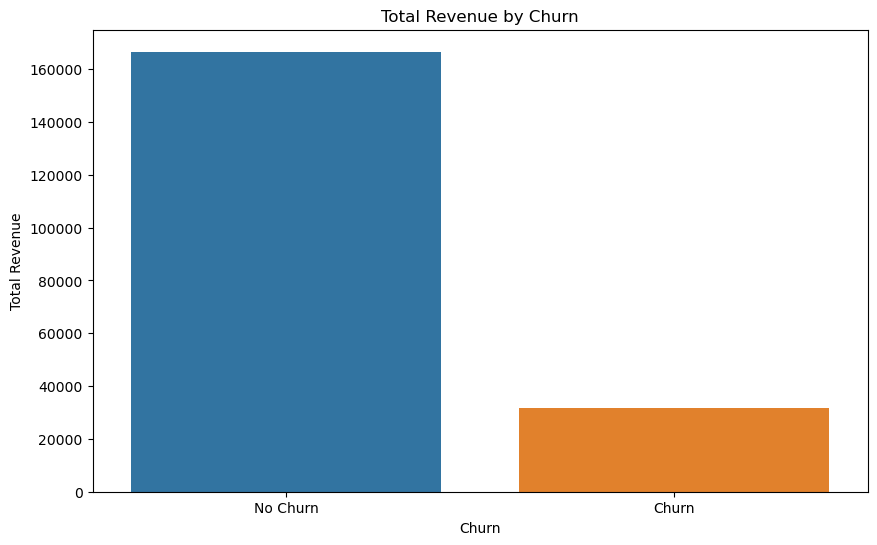

In [68]:
# Create a DataFrame containing only the necessary columns
df_revenue = df_new_churn[['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge', 'Churn']]

# Calculate total revenue from services for both churn and non-churn groups
df_revenue['Total revenue'] = df_revenue[['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']].sum(axis=1)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x='Churn', y='Total revenue', data=df_revenue, estimator=sum, ci=None)
plt.title('Total Revenue by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Revenue')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

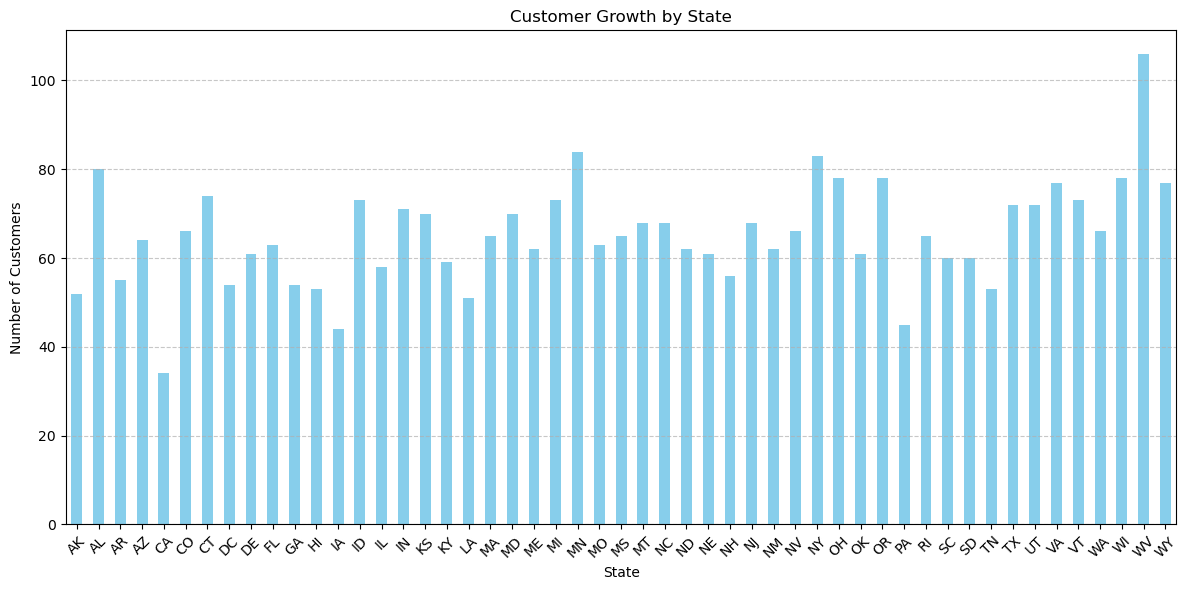

In [69]:

# Calculate the total number of customers in each state
customer_count_by_state = df_new_churn.groupby('State')['Account length'].count()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
customer_count_by_state.plot(kind='bar', color='skyblue')
plt.title('Customer Growth by State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


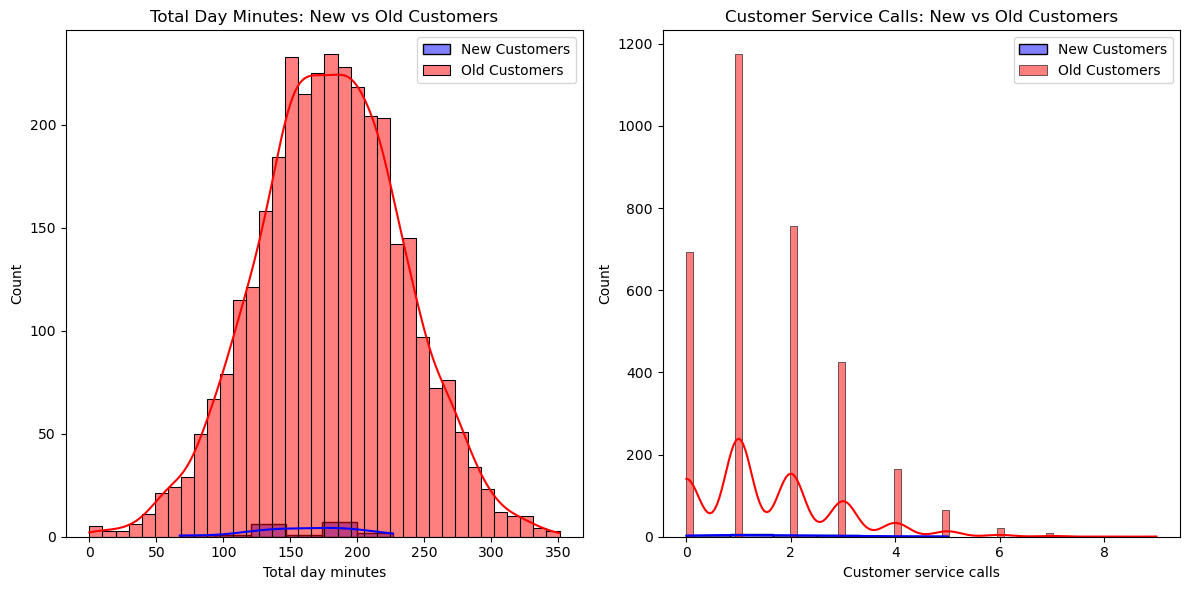

New Customers Statistics:
       Account length   Area code  International plan  Voice mail plan  \
count       18.000000   18.000000           18.000000        18.000000   
mean         2.555556  434.166667            0.166667         0.277778   
std          1.756408   41.820696            0.383482         0.460889   
min          1.000000  408.000000            0.000000         0.000000   
25%          1.000000  409.750000            0.000000         0.000000   
50%          2.500000  415.000000            0.000000         0.000000   
75%          3.000000  415.000000            0.000000         0.750000   
max          6.000000  510.000000            1.000000         1.000000   

       Number vmail messages  Total day minutes  Total day calls  \
count              18.000000          18.000000        18.000000   
mean                8.055556         162.050000        98.888889   
std                13.523279          38.664001        20.366896   
min                 0.000000       

In [70]:
# Add columns to classify new and old customers
df_new_churn['Customer_Type'] = df_new_churn['Account length'].apply(lambda x: 'New' if x <= 6 else 'Old')

# Analyze new and old customer data
new_customers = df_new_churn[df_new_churn['Customer_Type'] == 'New']
old_customers = df_new_churn[df_new_churn['Customer_Type'] == 'Old']

# Compare metrics between new and old customers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(new_customers['Total day minutes'], kde=True, color='blue', label='New Customers')
sns.histplot(old_customers['Total day minutes'], kde=True, color='red', label='Old Customers')
plt.legend()
plt.title('Total Day Minutes: New vs Old Customers')

plt.subplot(1, 2, 2)
sns.histplot(new_customers['Customer service calls'], kde=True, color='blue', label='New Customers')
sns.histplot(old_customers['Customer service calls'], kde=True, color='red', label='Old Customers')
plt.legend()
plt.title('Customer Service Calls: New vs Old Customers')

plt.tight_layout()
plt.show()

# Print out some descriptive statistics
print("New Customers Statistics:")
print(new_customers.describe())

print("\nOld Customers Statistics:")
print(old_customers.describe())